<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Import Needed Libraries
    </h1>
    </div>

In [152]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Reading Dataset And Get Info
    </h1>
    </div>

## Load Data

In [113]:
df = pd.read_csv('diabetes.csv')

In [114]:
# Show Sample of Data
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
407,0,101,62,0,0,21.9,0.336,25,0
269,2,146,0,0,0,27.5,0.240,28,1
4,0,137,40,35,168,43.1,2.288,33,1
7,10,115,0,0,0,35.3,0.134,29,0
448,0,104,64,37,64,33.6,0.510,22,1


In [115]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 768
Number of Columns : 9


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [117]:
# Check NaN Value
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [118]:
# Describe Numiric Data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- the min value in  5 columns = 0 (Glucose, BloodPressure, Skin Thickness, Insulin, BMI)
- In skin Thickness and Insulin Column less than or equal 25% of the data are null values
- look at the maximum Insulin Value = 846 wich is too high u will never find a person with this insulin value

  all this an errors in data collection

In [119]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Pregnancies,768,0,0.0,17
Glucose,768,0,0.0,136
BloodPressure,768,0,0.0,47
SkinThickness,768,0,0.0,51
Insulin,768,0,0.0,186
BMI,768,0,0.0,248
DiabetesPedigreeFunction,768,0,0.0,517
Age,768,0,0.0,52
Outcome,768,0,0.0,2


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Handling Missing Data (Nulls)
    </h1>
    </div>

#### Convert those 0's values in these 5 columns to determine how many missing valuesin each feature in our data

In [120]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness'
                                                                      ,'Insulin','BMI']].replace(0 , np.nan) 

In [121]:
# After Convert 0 To NaN
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### Handling Missing Data

In [122]:
def median_target(column):
    temp = df.groupby('Outcome')[column].median()
    df.loc[(df['Outcome'] == 0) & (df[column].isna()) , column ] = temp[0]
    df.loc[(df['Outcome'] == 1) & (df[column].isna()) , column ] = temp[1]

In [123]:
columns_to_Fill = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in columns_to_Fill:
    median_target(column)

In [124]:
# After Fill Missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Detection Outliers 
    </h1>
    </div>

In [125]:
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

numerical_columns = df.columns.to_list()[:-1]
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

Pregnancies: 4 outliers detected
Glucose: 0 outliers detected
BloodPressure: 14 outliers detected
SkinThickness: 87 outliers detected
Insulin: 51 outliers detected
BMI: 8 outliers detected
DiabetesPedigreeFunction: 29 outliers detected
Age: 9 outliers detected


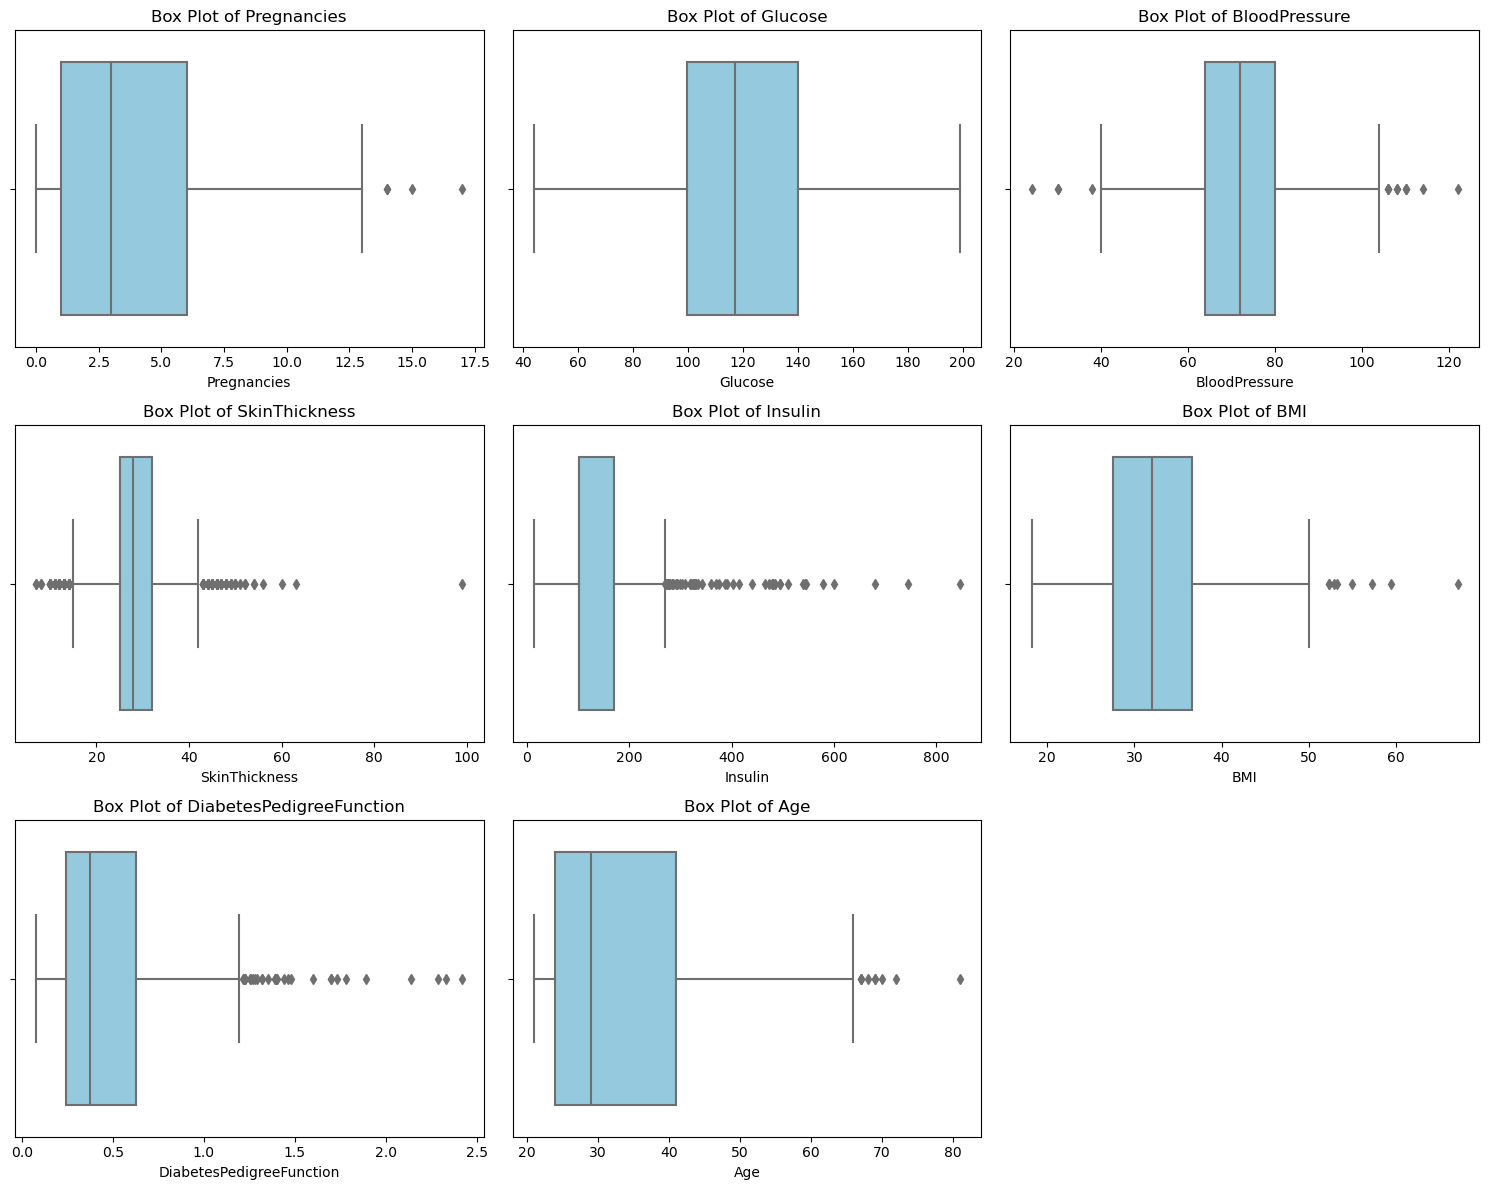

In [126]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x = df[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

In [127]:
def remove_outliers(df, columns, threshold=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  # First quartile (25%)
        Q3 = df_clean[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        df_clean = df_clean[(df_clean[col] > lower_bound) & (df_clean[col] < upper_bound)]
    
    return df_clean

df_cleaned = remove_outliers(df, numerical_columns)

In [128]:
# The New of Shape Cleaned Data
print(f"Number of Row : {df_cleaned.shape[0]}\nNumber of Columns : {df_cleaned.shape[1]}")

Number of Row : 579
Number of Columns : 9


#### Cleaned Data BoxPlot To Show Outliers

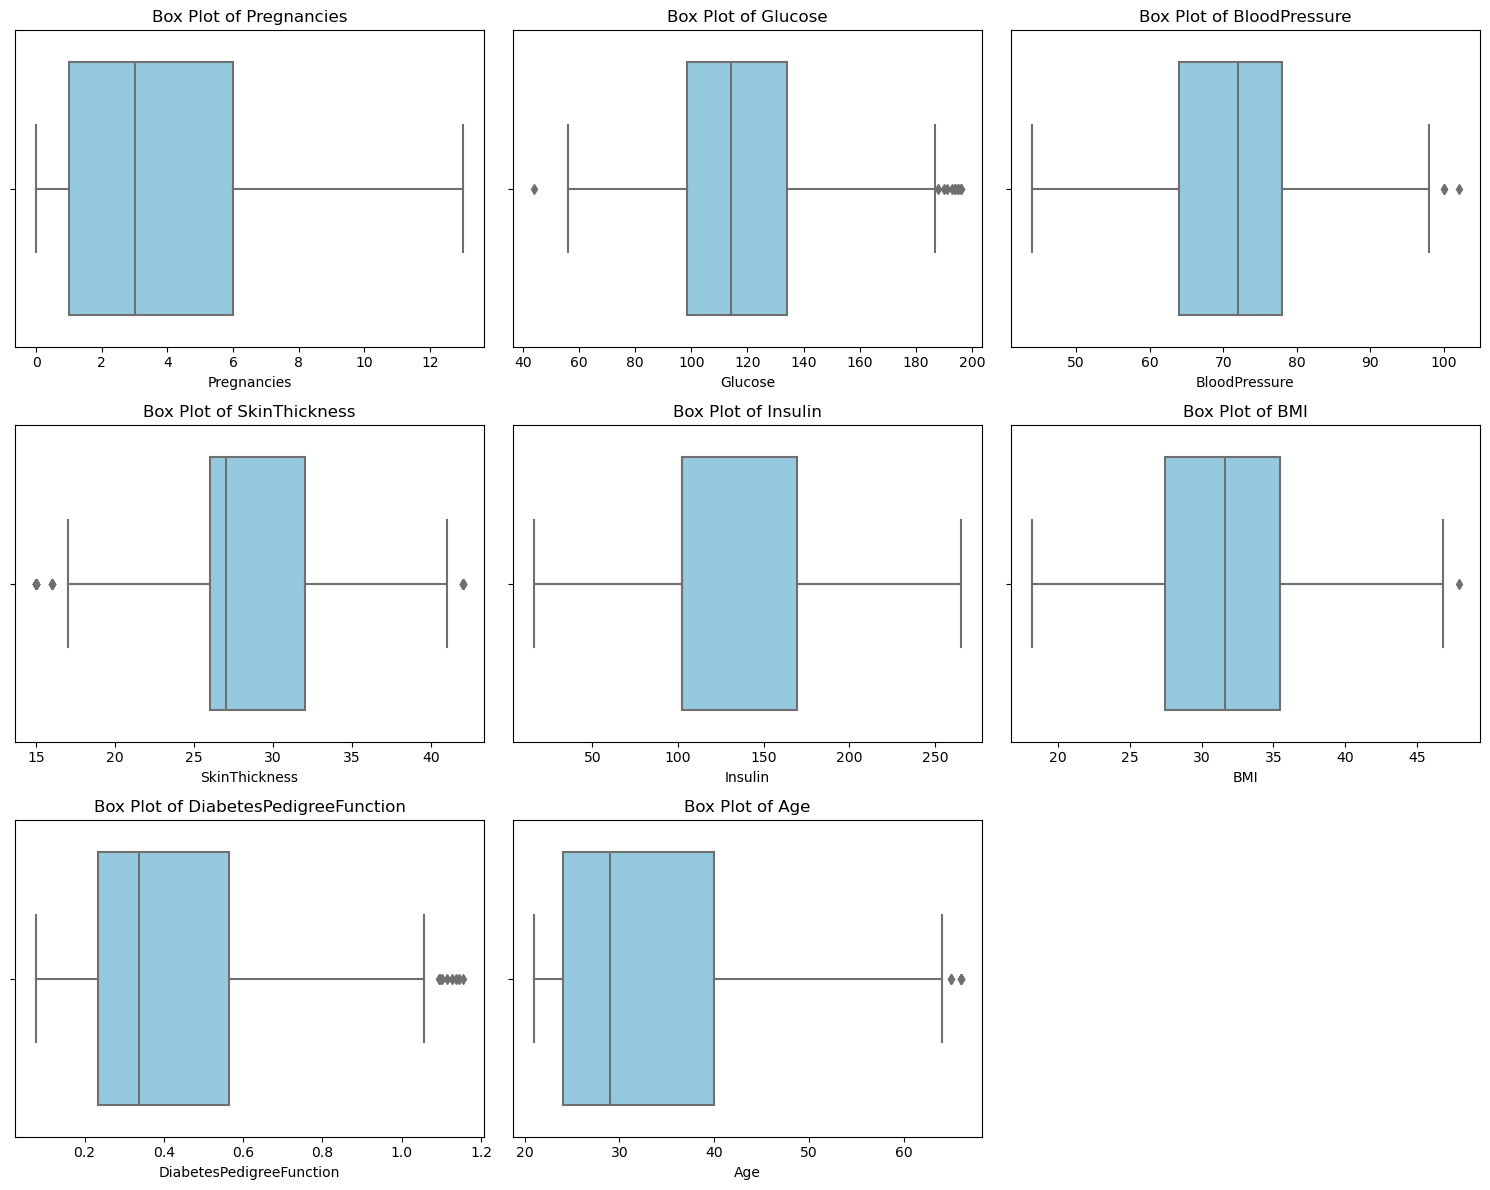

In [129]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i) 
    sns.boxplot(x = df_cleaned[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [130]:
df_cleaned.reset_index(inplace = True , drop = True)
df_cleaned.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
28,4,103.0,60.0,33.0,192.0,24.0,0.966,33,0
121,7,102.0,74.0,40.0,105.0,37.2,0.204,45,0
225,0,167.0,74.5,32.0,169.5,32.3,0.839,30,1
207,13,106.0,70.0,27.0,102.5,34.2,0.251,52,0
279,3,81.0,86.0,16.0,66.0,27.5,0.306,22,0


In [131]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               579 non-null    int64  
 1   Glucose                   579 non-null    float64
 2   BloodPressure             579 non-null    float64
 3   SkinThickness             579 non-null    float64
 4   Insulin                   579 non-null    float64
 5   BMI                       579 non-null    float64
 6   DiabetesPedigreeFunction  579 non-null    float64
 7   Age                       579 non-null    int64  
 8   Outcome                   579 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 40.8 KB


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         EDA of Data and Get Insights
    </h1>
    </div>

#### The number of people who have diabetes

In [132]:
fig = px.pie(values = df_cleaned['Outcome'].value_counts(),
             names = ['Have No Diabetes','Have Diabetes'],
             template = 'plotly_dark',
             title = 'Percentage of diabetics in the data'
             ).update_traces(textinfo='label+percent')

fig.show()

- We have 68% healthy pepole and 32% Sick pepole in the data

#### Pregnancy Count Distribution

In [133]:
fig = px.bar(df_cleaned['Pregnancies'].value_counts().sort_index(),
             color = df_cleaned['Pregnancies'].value_counts().sort_index().index,
             template = 'plotly_dark',
             title = 'Pregnancy Count Distribution',
             labels = {'value':'Count'},
             text_auto = True
             )
fig.show()

#### Distributions of 'Glucose' ,'BloodPressure' ,'SkinThickness' ,'Insulin' ,'BMI' ,'DiabetesPedigreeFunction' and Age

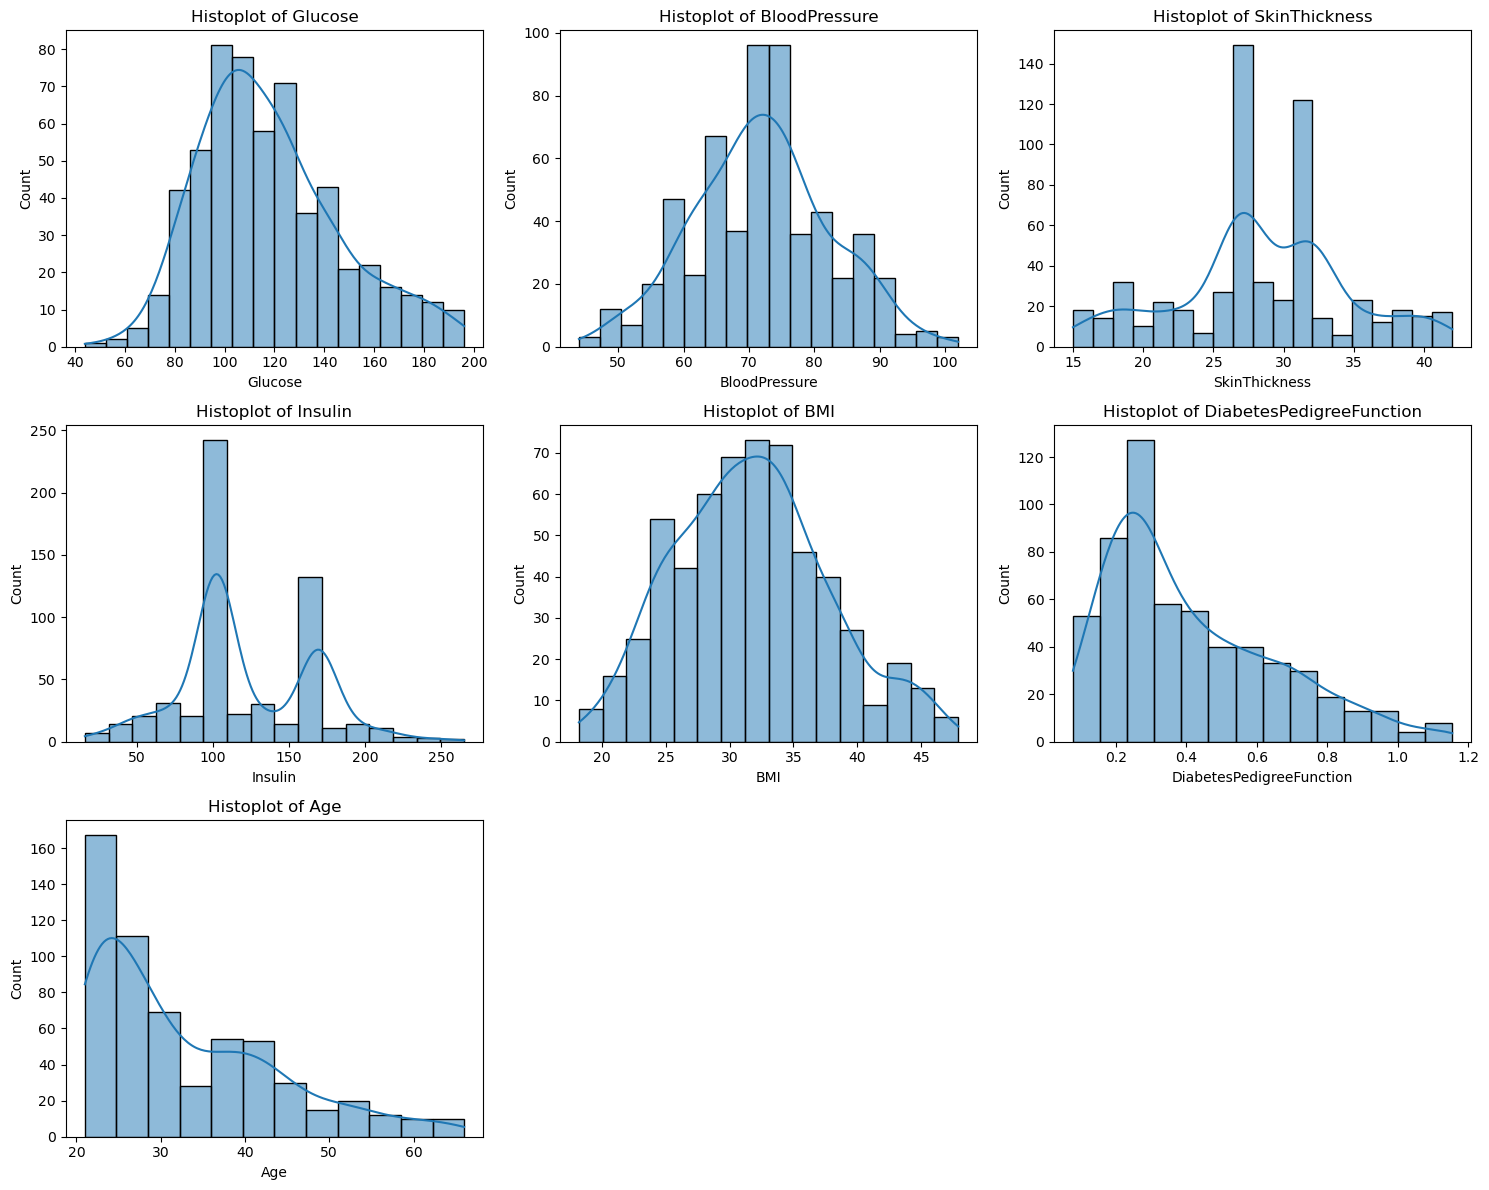

In [134]:
plt.figure(figsize=(15, 12))
columns_histo = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for i, col in enumerate(columns_histo, 1):
    plt.subplot(3, 3, i) 
    sns.histplot(df_cleaned[col],kde=True)
    plt.title(f"Histoplot of {col}")

plt.tight_layout()
plt.show()

#### Categorize Values and visualizing the categories

In [135]:
def categorize_values(df):
    df['Glucose_Category'] = pd.cut(df['Glucose'], bins=[0, 99, 125, float('inf')],
                                    labels=['Normal', 'Prediabetes', 'Diabetes'], right=False)
    
    df['BloodPressure_Category'] = pd.cut(df['BloodPressure'], bins=[44, 89, 99, 104, float('inf')],
                                          labels=['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2'], right=False)

    df['SkinThickness_Category'] = pd.cut(df['SkinThickness'], bins=[0, 30, float('inf')],
                                          labels=['Normal', 'Elevated'], right=False)
    
    df['Insulin_Category'] = pd.cut(df['Insulin'], bins=[0, 24.9, float('inf')],
                                    labels=['Normal', 'High'], right=False)
    
    df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
                                labels=['Underweight', 'Normal weight', 'Overweight', 'Obese (Class 1)', 'Obese (Class 2)', 'Obese (Class 3)'], right=False)
    
    df['DiabetesPedigreeFunction_Category'] = pd.cut(df['DiabetesPedigreeFunction'], bins=[0, 0.5, 1.0, 1.5, 2.5],
                                                    labels=['Low risk', 'Moderate risk', 'High risk', 'Very high risk'], right=False)

    return df
df_cleaned = categorize_values(df_cleaned)

In [136]:
# Show after Categorized
df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Category,BloodPressure_Category,SkinThickness_Category,Insulin_Category,BMI_Category,DiabetesPedigreeFunction_Category
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Diabetes,Normal,Elevated,High,Obese (Class 1),Moderate risk
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Normal,Normal,Normal,High,Overweight,Low risk
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Diabetes,Normal,Elevated,High,Normal weight,Moderate risk
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Normal,Normal,Normal,High,Overweight,Low risk
4,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Prediabetes,Normal,Normal,High,Overweight,Low risk


In [137]:
columns_Category = ['Glucose_Category','BloodPressure_Category','SkinThickness_Category','Insulin_Category',
                    'BMI_Category','DiabetesPedigreeFunction_Category']

for i,col in enumerate(columns_Category , 1):
   fig = px.pie(title = f'{col}',
       values = df_cleaned[col].value_counts().values,
       names = df_cleaned[col].value_counts().index,
       template = 'plotly_dark'
         ).update_traces(textinfo='label+percent')
   fig.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Data Preprocessing
    </h1>
    </div>

#### Delete the categorical columns that were added

In [144]:
df_cleaned.drop(df_cleaned.columns.to_list()[9:] , axis = 1,inplace = True)

#### Assign feature and target variables

In [149]:
X = df_cleaned.drop('Outcome',axis=1)
y = df_cleaned['Outcome']

#### Splitting Data 

In [150]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 44 , shuffle = True)

In [151]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (434, 8)
Shape of X_Test (145, 8)
Shape of Y_Train (434,)
Shape of Y_Test (145,)


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Modeling
    </h1>
    </div>

## Use Different Models Algorithm

In [154]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

## Logistic Regression

In [160]:
lr = LogisticRegression()
kfolds(lr, "Logistic Regression")
train(lr, "Logistic Regression")

Logistic Regression score on cross validation: 86.70014992503748%
Logistic Regression model score on Training data: 85.48387096774194%
Logistic Regression model score on Testing data: 91.0344827586207%


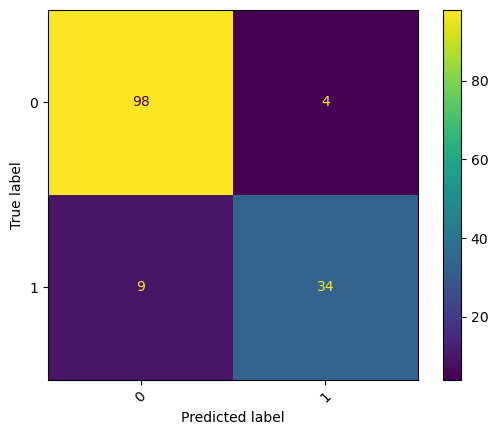

In [161]:
ConfusionMatrixDisplay.from_estimator(lr,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [162]:
class_report(lr)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       102
           1       0.89      0.79      0.84        43

    accuracy                           0.91       145
   macro avg       0.91      0.88      0.89       145
weighted avg       0.91      0.91      0.91       145



## Random Forest

In [163]:
rf = RandomForestClassifier()
kfolds(rf, "Random Forest")
train(rf, "Random Forest")

Random Forest score on cross validation: 90.67616191904048%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 91.72413793103448%


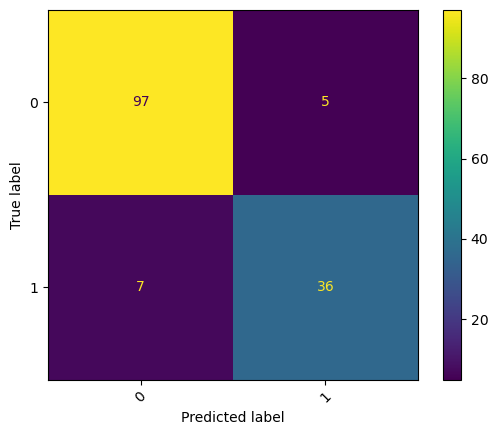

In [164]:
ConfusionMatrixDisplay.from_estimator(rf,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [165]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       102
           1       0.88      0.84      0.86        43

    accuracy                           0.92       145
   macro avg       0.91      0.89      0.90       145
weighted avg       0.92      0.92      0.92       145



## KNN

In [166]:
knn = KNeighborsClassifier()
kfolds(knn, "KNN")
train(knn, "KNN")

KNN score on cross validation: 89.11244377811094%
KNN model score on Training data: 90.09216589861751%
KNN model score on Testing data: 92.41379310344827%


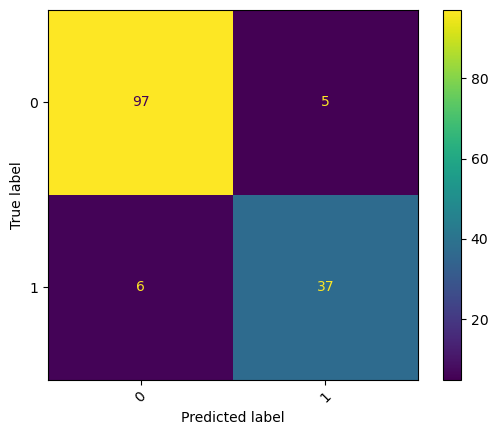

In [167]:
ConfusionMatrixDisplay.from_estimator(knn,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [168]:
class_report(knn)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       102
           1       0.88      0.86      0.87        43

    accuracy                           0.92       145
   macro avg       0.91      0.91      0.91       145
weighted avg       0.92      0.92      0.92       145



## Bagging

In [169]:
bagg_model = BaggingClassifier()
kfolds(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 89.29085457271364%
Bagging model score on Training data: 99.07834101382488%
Bagging model score on Testing data: 93.10344827586206%


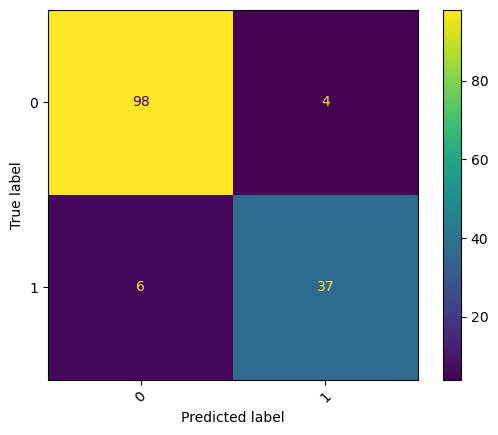

In [170]:
ConfusionMatrixDisplay.from_estimator(bagg_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [171]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       102
           1       0.90      0.86      0.88        43

    accuracy                           0.93       145
   macro avg       0.92      0.91      0.92       145
weighted avg       0.93      0.93      0.93       145



## Gradient Boosting

In [174]:
gb_model = GradientBoostingClassifier(n_estimators=150, random_state=20)
kfolds(gb_model, "Boosting")
train(gb_model, "Boosting")

Boosting score on cross validation: 89.2968515742129%
Boosting model score on Training data: 100.0%
Boosting model score on Testing data: 91.72413793103448%


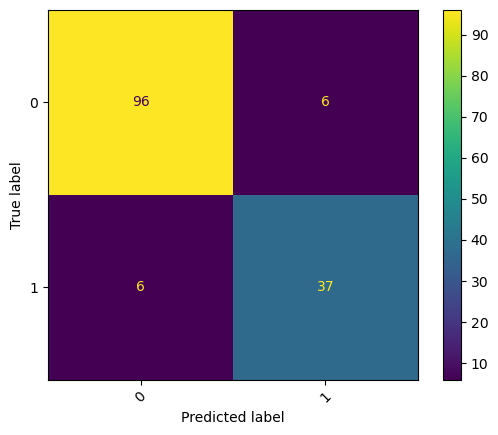

In [175]:
ConfusionMatrixDisplay.from_estimator(gb_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [176]:
class_report(gb_model)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       102
           1       0.86      0.86      0.86        43

    accuracy                           0.92       145
   macro avg       0.90      0.90      0.90       145
weighted avg       0.92      0.92      0.92       145



## Decision Tree

In [177]:
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 87.2263868065967%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 91.72413793103448%


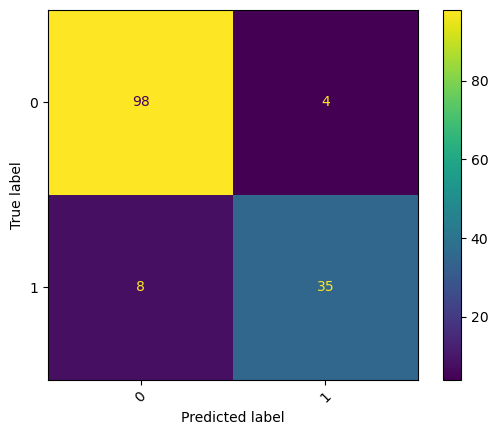

In [179]:
ConfusionMatrixDisplay.from_estimator(dt_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [178]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       102
           1       0.90      0.81      0.85        43

    accuracy                           0.92       145
   macro avg       0.91      0.89      0.90       145
weighted avg       0.92      0.92      0.92       145



## SVM

In [ ]:
svm_model = SVC(C=50 , kernel='rbf')
kfolds(svm_model, "SVM")
train(svm_model, "SVM")

SVM score on cross validation: 88.42428785607197%
SVM model score on Training data: 90.09216589861751%
SVM model score on Testing data: 92.41379310344827%


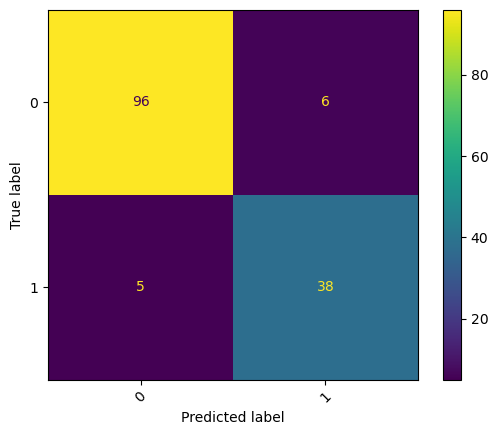

In [198]:
ConfusionMatrixDisplay.from_estimator(svm_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [199]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.86      0.88      0.87        43

    accuracy                           0.92       145
   macro avg       0.91      0.91      0.91       145
weighted avg       0.92      0.92      0.92       145



## Xgboost

In [200]:
xgboost = XGBClassifier()
kfolds(xgboost, "Xgboost")
train(xgboost, "Xgboost")

Xgboost score on cross validation: 89.9865067466267%
Xgboost model score on Training data: 100.0%
Xgboost model score on Testing data: 92.41379310344827%


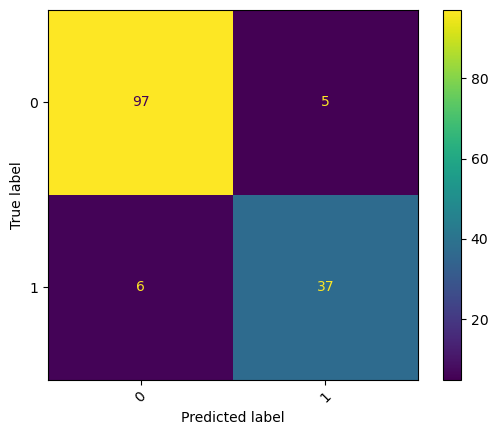

In [202]:
ConfusionMatrixDisplay.from_estimator(xgboost,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [203]:
class_report(xgboost)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       102
           1       0.88      0.86      0.87        43

    accuracy                           0.92       145
   macro avg       0.91      0.91      0.91       145
weighted avg       0.92      0.92      0.92       145

